
## 데이터 로더 및 증강

In [1]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train'
validation_dir = './test'
batch_size = 32
image_size = 224

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 쵀대 20도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      vertical_flip=True, # 상하 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)
print(class_num)
custom_labels = list(validation_generator.class_indices.keys())
print(custom_labels)

Using TensorFlow backend.


Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
3
['cured', 'decayed', 'healthy']



## 분류 실행 ResNet으로  ImageNet 분류

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications import vgg16
from keras.applications import resnet50
from IPython.display import display
import numpy as np

def predict_resnet50(model, filename) :

  image = load_img(filename)
  display(image)
  image = load_img(filename, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,224, 224, 3))

#  image = vgg16.preprocess_input(image)
  image = resnet50.preprocess_input(image)
  
  yhat = model.predict(image) 
    
#  label = vgg16.decode_predictions(yhat)
  label = resnet50.decode_predictions(yhat)

  label = label[0][0]
  
  print(f'label[1]:{label[1]},label[2]*100:{label[2]*100:.2f}')

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

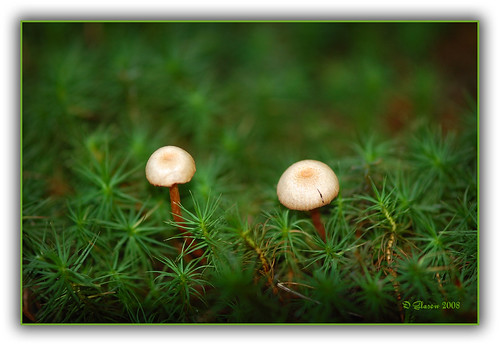

label[1]:mushroom,label[2]*100:67.87


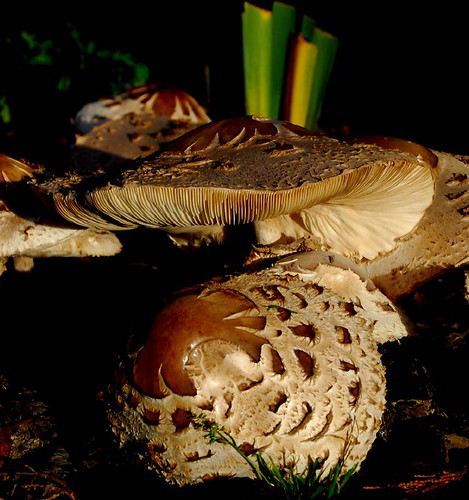

label[1]:mushroom,label[2]*100:81.50


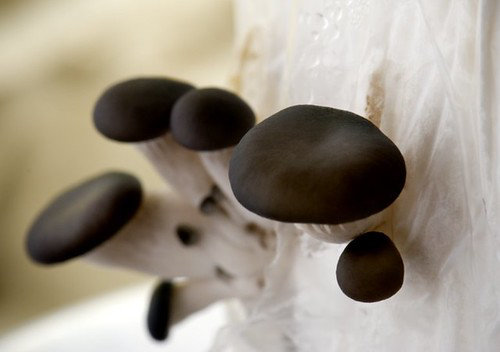

label[1]:dough,label[2]*100:39.13


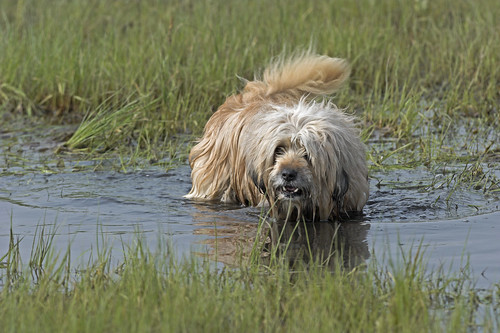

label[1]:Tibetan_terrier,label[2]*100:98.08


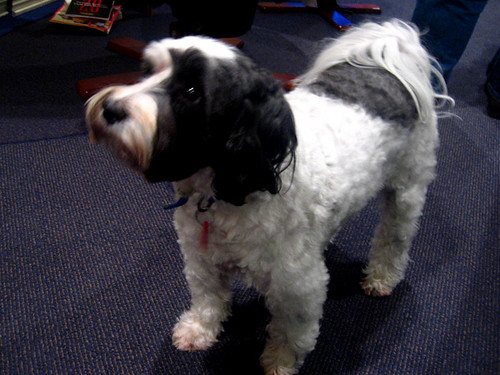

label[1]:Tibetan_terrier,label[2]*100:92.73


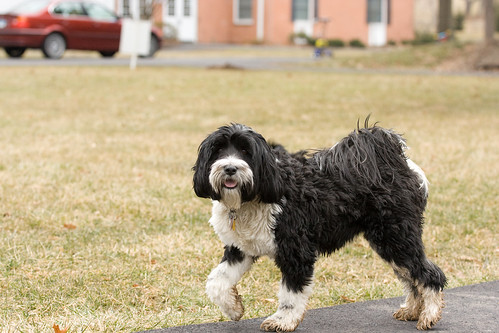

label[1]:Tibetan_terrier,label[2]*100:60.29


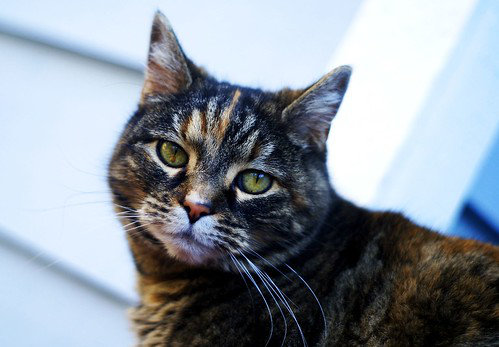

label[1]:tabby,label[2]*100:50.11


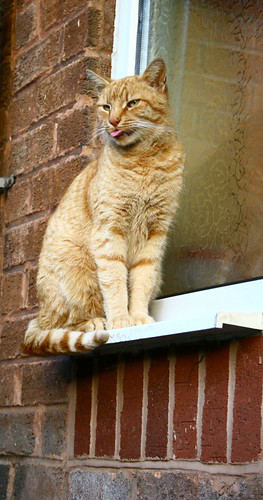

label[1]:tabby,label[2]*100:48.09


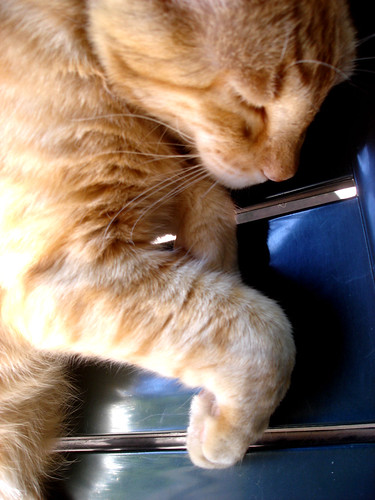

label[1]:laptop,label[2]*100:42.23


In [3]:
#from keras.applications import vgg16
from keras.applications import resnet50

# RestNet50 모델 불러오기
#model = vgg16.VGG16()
model = resnet50.ResNet50()

model.summary()

files = ['imagenet/mushroom1.jpg',
         'imagenet/mushroom2.jpg',
         'imagenet/mushroom3.jpg',
         'imagenet/dog1.jpg',
         'imagenet/dog2.jpg',
         'imagenet/dog3.jpg',
         'imagenet/cat1.jpg',
         'imagenet/cat2.jpg',
         'imagenet/cat3.jpg',
        ]

for file in files :
#  predict_vgg16(model, file)  
  predict_resnet50(model, file)    


## 모델 새로 정의

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session()

#from keras.applications import vgg16
from keras.applications import resnet50

#conv_layers = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers.summary()

for layer in conv_layers.layers:
    layer.trainable = False

model = models.Sequential()
model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))
model.summary()

# vgg16_model_path = 'new_trained_from_vgg16.h5'
resnet50_model_path = 'new_trained_from_resnet50.h5'

# model.save(vgg16_model_path)
model.save(resnet50_model_path)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 126,352,259
Trainable params: 102,764,547
Non-trainable params: 23,587,712
_________________________________________________________________



## 새모델 학습

In [6]:
from keras.models import load_model

#model = load_model(vgg16_model_path)
model = load_model(resnet50_model_path)
model.compile(loss='categorical_crossentropy',  #sparse_categorical_crossentropy  
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
#model.save(vgg16_model_path)
model.save(resnet50_model_path)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Epoch 1/50
5/4 [================================] - 7s 1s/step - loss: 25.3909 - acc: 0.3333 - val_loss: 6.7652 - val_acc: 0.3333
Epoch 2/50
5/4 [================================] - 2s 404ms/step - loss: 4.7587 - acc: 0.4867 - val_loss: 2.9663 - val_acc: 0.3333
Epoch 3/50
5/4 [================================] - 2s 392ms/step - loss: 2.4884 - acc: 0.5800 - val_loss: 0.7951 - val_acc: 0.6167
Epoch 4/50
5/4 [================================] - 2s 395ms/step - loss: 1.4365 - acc: 0.6400 - val_loss: 1.8580 - val_acc: 0.3833
Epoch 5/50
5/4 [================================] - 2s 396ms/step - loss: 1.1020 - acc: 0.7667 - val_loss: 2.6869 - val_acc: 0.4667
Epoch 6/50
5/4 [================================] - 2s 419ms/step - loss: 1.2277 - acc: 0.6933 - val_loss: 2.6374 - val_acc: 0.3333
Epoch 7/50
5/4 [================================] - 2s 397ms/step - loss: 1.0900 - acc: 0.6933 - val_loss: 4.4096 - val_acc: 0.4000
Epoch 8/50
5/4 [================================] - 2s 396ms/step - loss: 1.30

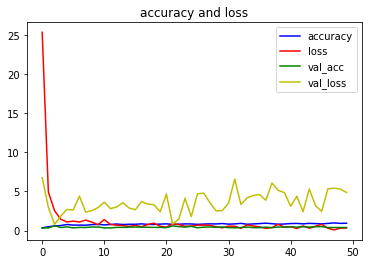

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_acc, 'g', label='val_acc')
plt.plot(epochs, val_loss, 'y', label='val_loss')

plt.title('accuracy and loss')
plt.legend()
  
plt.show()


## 새 학습 모델로 분류 실행

In [10]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications import vgg16
from keras.applications import resnet50
from IPython.display import display
import numpy as np

def predict_custom_resnet50(model, filename) :

  image = load_img(filename)
  display(image)
  image = load_img(filename, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1, 224, 224, 3))
#  image = vgg16.preprocess_input(image)
  image = resnet50.preprocess_input(image)
  yhat = model.predict(image)

  # 최대 출력 인덱스를 구한다.
  idx=np.argmax(yhat[0])

  # 커스텀 레이블을 출력한다.
  print('%s (%.2f%%)' % (custom_labels[idx], yhat[0][idx]*100))

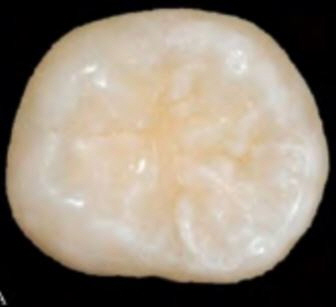

healthy (100.00%)


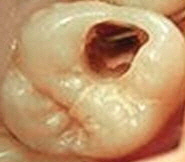

decayed (100.00%)


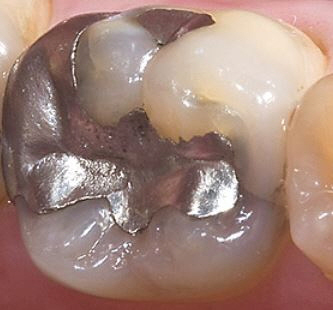

decayed (96.17%)


In [12]:
from keras.models import load_model

model = load_model(resnet50_model_path)
  
files = [
    './test/healthy/1.jpg',
    './test/decayed/101.jpg',
    './test/cured/301.jpg'
        ]

for file in files :
  predict_custom_resnet50(model, file)     
  